In [ ]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
import numpy as np
import string
from sklearn import linear_model
from tqdm.notebook import tqdm
import scipy.optimize as opt
import random

# Importing Dataset

In [ ]:
def readGz(path):
  for l in gzip.open(path, 'rt'):
    yield eval(l)

def readCSV(path):
  f = gzip.open(path, 'rt')
  f.readline()
  for l in f:
    yield l.strip().split(',')

In [ ]:
answers = {}

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
# allRatings = np.array(allRatings)
# allRatings = np.hstack((allRatings[:,:-1],nos))

In [ ]:
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(((i[1],1)))
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add((i[0],1))

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
# print(itemsPerUser)
print(max(len(itemsPerUser[x]) for x in itemsPerUser))

82


In [ ]:
n= len(ratingsValid)
allBooks = set(usersPerItem.keys())
for i in tqdm(range(n)):
  # creating non read set
  notRead = allBooks - set(itemsPerUser[ratingsValid[i][0]])
  randi = random.sample(notRead,1)
  
  # adding negative Samples
  ratingsValid.append((ratingsValid[i][0], randi[0], -1))
  

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
cntBooksPop = defaultdict(int)
for i in tqdm(itemsPerUser):
  # print(itemsPerUser[i])
  for j in itemsPerUser[i]:
    cntBooksPop[j[0]]+=1
  
cntBooksPop = dict(sorted(cntBooksPop.items(), key=lambda item: item[1],reverse=True))
print(cntBooksPop)

  0%|          | 0/27945 [00:00<?, ?it/s]

{'b93745301': 928, 'b06167371': 849, 'b70912031': 823, 'b79928088': 799, 'b29802159': 710, 'b19867465': 687, 'b08004121': 675, 'b82148195': 674, 'b78275112': 656, 'b09049778': 628, 'b74821603': 626, 'b26138336': 612, 'b52929604': 586, 'b23760358': 580, 'b66664015': 580, 'b79253970': 576, 'b05154189': 575, 'b08545824': 565, 'b18610759': 542, 'b26385014': 502, 'b86788370': 494, 'b93997659': 483, 'b07278059': 477, 'b08349503': 475, 'b88947899': 470, 'b58973293': 470, 'b60484296': 456, 'b29576446': 455, 'b05231805': 447, 'b21674268': 441, 'b98844131': 435, 'b52736396': 431, 'b61372131': 430, 'b40598851': 427, 'b29738200': 426, 'b63603925': 419, 'b31687952': 416, 'b07812624': 415, 'b66908318': 410, 'b31988440': 408, 'b78008834': 401, 'b56105038': 400, 'b03946791': 394, 'b29998162': 392, 'b31362596': 390, 'b50384790': 380, 'b52842739': 377, 'b19822827': 360, 'b21557753': 355, 'b67584295': 355, 'b35526856': 350, 'b12526023': 350, 'b12151882': 342, 'b76040943': 341, 'b69989437': 337, 'b8343968

In [ ]:
# cntBooksPop["b69684851"] +=1

In [ ]:
totalReadings = sum(cntBooksPop.values())
print(totalReadings)
print(len(cntBooksPop.values()))

190000
6684


In [ ]:
cnt = 0
top1Per = set()
for i in cntBooksPop:
  top1Per.add(i)
  cnt+=cntBooksPop[i]
  if cnt>totalReadings*0.74:
    break
len(top1Per)


1525

In [ ]:
# Evaluating
# it is mentioned that the baseline models returns whether a book has been read or not based on most pop
# print(ratingsValid[10000])
corr_pred = 0
for i in tqdm(ratingsValid):
  if i[1] in top1Per:
    if i[2]>=0:
      corr_pred+=1
  else:
    if i[2]==-1:
      corr_pred+=1
acc = corr_pred/len(ratingsValid)
print("Accuracy = ",corr_pred/len(ratingsValid)*100,"%")
answers["Q1"] = acc
print(answers)

  

  0%|          | 0/20000 [00:00<?, ?it/s]

Accuracy =  74.75500000000001 %
{'Q1': 0.74755}


# Popularity books 
74% testScore 0.7668

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  if b in top1Per:
    predictions.write(u + ',' + b + ",1\n")
  else:
    predictions.write(u + ',' + b + ",0\n")

predictions.close()

In [ ]:
# def Jaccard(s1, s2):
#     try:
#       return len(s1.intersection(s2))/len(s1.union(s2))
#     except:
#       return 0

In [ ]:
# import csv
# # accuracy = []
# testData = []
# tmp = ""
# with open('/content/pairs_Read.csv', newline='') as csvfile:
#   f = csv.reader(csvfile, delimiter=' ', quotechar='|')
#   tmp = next(f)

#   for i in f:
#     testData.append(i[0].split(','))
#     # break

# print(tmp)

# # corr_pred = 0
# cnt = 0
# top1Per = set()
# for k in cntBooksPop:
#   top1Per.add(k)
#   cnt+=cntBooksPop[k]
#   if cnt > (74*totalReadings)//100:
#     break
# with open("predictions_Read.csv",'w',encoding = 'utf-8') as f:
#   tmp = tmp[0].split(",")
#   f.write(str(tmp[0])+","+str(tmp[1])+","+tmp[2]+"\n")
#   for i in tqdm(testData):
#     # print(i)
#     # break
#     user = i[0]
#     bpred = i[1]
#     # print(user,bpred)
#     # break
#     jaccardd = []
#     for j in itemsPerUser[user]:
#       s1 = usersPerItem[bpred]
#       s2 = usersPerItem[j[0]]
#       # print(s1)
#       # print(j[0])
#       s1.discard(user)
#       s2.discard(user)
      
#       # break
      
#       jaccardd.append(Jaccard(s1,s2))

      
#     # break
#     read = 0
#     if jaccardd!=[] and (max(jaccardd)>1/100 and bpred in top1Per):
#       read=1
#     f.write(str(user)+","+str(bpred)+","+str(read)+"\n")
#     # user,bpred
#   #   if read == 1 and i[2]>0:
#   #     corr_pred+=1
#   #   elif read == 0 and i[2]==0:
#   #     corr_pred+=1

#   # acc = corr_pred/len(ratingsValid)
#   # # accuracy.append(acc)

#   # print(acc)
#   # print((accuracy.index(max(accuracy))+1),"%")


['userID,bookID,prediction']


  0%|          | 0/20000 [00:00<?, ?it/s]

# Rating pred
Test MSE 1.4619 rank:20/600

## Hw3 Alpha and bias values

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
cnt0 = 0
cntPos = 0
cntNeg = 0
cnt01 = 0
cnt12 = 0
cnt23 = 0
cnt34 = 0
cnt3_35 = 0
cnt35_4 = 0
cnt45 = 0
for i in range(len(allRatings)):
  predRat = allRatings[i][2]
  if predRat == 0:
    cnt0+=1
  if predRat<=1 and predRat>0:
    cnt01+=1
  if predRat<=2 and predRat>1:
    cnt12+=1
  if predRat<=3 and predRat>2:
    cnt23+=1
  if predRat<=4 and predRat>3:
    cnt34+=1
    if predRat<=3.5:
      cnt3_35+=1
    else:
      cnt35_4+=1
  if predRat<=5 and predRat>4:
    cnt45+=1

print(cnt0,cnt01,cnt12,cnt23,cnt34,cnt45)
print(cnt3_35,cnt35_4)

10778 4396 12453 43432 66902 62039
0 66902


In [ ]:
# ratingsTrain = allRatings
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(((i[1],1)))
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add((i[0],1))

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
def modell(lamb):
  # lamb=1
  Bu = defaultdict(float)
  for user in itemsPerUser:
    # print("Ratings",len(ratingsPerUser[user]))
    # print(ratingsPerUser[user])
    ratiTmp = 0
    for i in ratingsPerUser[user]:
      ratiTmp+=i[1]
    Bu[user] = (ratiTmp/len(ratingsPerUser[user]))

  # print(Bu)


  # BI
  Bi = defaultdict(float)
  for item in usersPerItem:
    # print("Ratings",len(ratingsPerUser[user]))
    # print(ratingsPerUser[user])
    ratiTmp = 0
    # print(ratingsPerItem[item])
    # break
    for i in ratingsPerItem[item]:
      ratiTmp+=i[1]
    Bi[item] = (ratiTmp/len(ratingsPerItem[item]))

  # print(Bi)

  alpha = globalAvg
  # lamb = 1
  while True:
    # alpha
    palpha = alpha
    # print(Bu['u67805239'])
    numi = 0
    for i in ratingsTrain:
      user = i[0]
      item = i[1]
      rating = i[2]
      # print(rating,Bu[user],Bi[item])
      numi += rating-Bu[user]-Bi[item]
      # print(numi)
    # print("NUMI",numi)
    alpha = numi/len(ratingsTrain)
    # print("ALPHA",alpha)
    f=1
    # bu:
    
    for user in itemsPerUser: # gives me user names
      numi = 0
      for item in itemsPerUser[user]: # items of that uer
        item = item[0] # one item
        numi+=ratingDict[(user,item)]-alpha-Bi[item]
      deno = float(lamb)+len(itemsPerUser[user])
      # print(deno)
      Bu[user] = numi/deno
    
    # bi:
    
    for item in usersPerItem:
      numi = 0
      for user in usersPerItem[item]:
        user = user[0]
        numi+=ratingDict[(user,item)]-alpha-Bu[user]
      deno = float(lamb)+len(usersPerItem[item])
      Bi[item] = numi/deno
    # print(palpha,alpha)
    if round(palpha,2) == round(alpha,2):
      break
  # print("final",palpha,alpha)
  # accuracy = []
  return alpha,Bi,Bu
  # MSE
  # jay laud
  """
  sumi = 0
  for i in tqdm(ratingsValid):
    # print(i)
    # break
    user = i[0]
    bpred = i[1]
    rating = i[2]
    # print(user,bpred)
    # break
    # print(i)
    rating_pred = alpha+Bu[user]+Bi[bpred]

    sumi+=(rating_pred-rating)**2
    

  MSE = sumi/len(ratingsValid)
  print("MSE",MSE,float(lamb))
  return MSE
  # accuracy.append(acc)

  # print(acc)
  # print((accuracy.index(max(accuracy))+1),"%")
"""

In [ ]:
lambdaa = 4.46122830200134
alpha,Bi,Bu = modell(lambdaa)

In [ ]:
cntPos = 0
cntNeg = 0
cnt01 = 0 
cnt12 = 0 
cnt23 = 0 
cnt34 = 0
cnt3_35 = 0
cnt35_4 = 0
cnt45 = 0 
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = alpha+Bu[u]+Bi[b]
  # 0   1      2     3       4     5
# 10778 4396 12453 43432 66902 62039
  if predRat<0:
    predRat = 0
    cntNeg+=1
  if predRat>5:
    predRat = 5
    cntPos+=1


  if predRat<=1 and predRat>0:
    cnt01+=1
  if predRat<=2 and predRat>1:
    cnt12+=1
  if predRat<=3 and predRat>2:
    cnt23+=1
  if predRat<=4 and predRat>3:
    cnt34+=1
    if predRat<=3.5:
      cnt3_35+=1
    else:
      cnt35_4+=1
  if predRat<=5 and predRat>4:
    cnt45+=1

  if predRat < 0.5:
    predRat = 0
  # if predRat > 0.8 and predRat < 1 : 
  #   predRat = 1
  if (abs(predRat - round(predRat))<0.1):
    predRat = round(predRat)

  if predRat>=2.7 and predRat<=3:
    predRat = 3




  predictions.write(u + ',' + b + ',' + str(predRat) + '\n')

predictions.close()
print("neg",cntNeg)
print("pos",cntPos)
print(cnt01,cnt12,cnt23,cnt34,cnt45)
print(cnt3_35,cnt35_4)

neg 1
pos 24
13 63 871 6129 2923
2344 3785


## Same as above with regularizer

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][0] = int(allRatings[i][0][1:])
  allRatings[i][1] = int(allRatings[i][1][1:])
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
import pandas as pd
df = pd.DataFrame (allRatings, columns = ['user',"item","rating"])

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from surprise import BaselineOnly , Reader , Dataset
from surprise. model_selection import train_test_split

In [ ]:
# reader = Reader( line_format ='user item rating', sep=',')
reader = Reader(rating_scale=(0, 5))
data = Dataset. load_from_df(df, reader= reader)
dataTrain , dataTest = train_test_split (data , test_size =.25)

### ALS

In [ ]:
bsl_options = {"method": "als", "n_epochs": 100, "reg_u": 4, "reg_i": 5.5}
model = BaselineOnly(bsl_options=bsl_options)
model.fit( dataTrain )
predictions = model.test(dataTest)

Estimating biases using als...


In [ ]:
model.bsl_options

{'method': 'als', 'n_epochs': 100, 'reg_u': 4, 'reg_i': 5.5}

In [ ]:
sse = 0
for p in predictions :
  sse += (p.r_ui - p.est)**2
MSE = sse / len( predictions )

In [ ]:
MSE

1.4525275002061815

In [ ]:
df[:4]

,user,item,rating
0,67805239,61372131,4
1,54531895,75189008,4
2,76549666,75446982,4
3,3186275,23482469,2


In [ ]:
print(model.predict(76549666,75446982)[3])

3.191952269585513


##### Processing testdata

In [ ]:

testItemPerUserSVD = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = model.predict(int(u[1:]),int(b[1:]))[3]
  testItemPerUserSVD[u].append((b,predRat))

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserSVD:
  testItemPerUserSVD[u] = sorted(testItemPerUserSVD[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserSVD[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserSVD[u][b] = (testItemPerUserSVD[u][b][0],1)
    else:
      testItemPerUserSVD[u][b] = (testItemPerUserSVD[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserSVD[u][b][0]] = testItemPerUserSVD[u][b][1]
  testItemPerUserSVD[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserSVD[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


In [ ]:
cntPos = 0
cntNeg = 0
cnt01 = 0 
cnt12 = 0 
cnt23 = 0 
cnt34 = 0
cnt3_35 = 0
cnt35_4 = 0
cnt45 = 0 
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = model.predict(int(u[1:]),int(b[1:]))[3]
  # 0   1      2     3       4     5
# 10778 4396 12453 43432 66902 62039
  if predRat<0:
    predRat = 0
    cntNeg+=1
  if predRat>5:
    predRat = 5
    cntPos+=1


  if predRat<=1 and predRat>0:
    cnt01+=1
  if predRat<=2 and predRat>1:
    cnt12+=1
  if predRat<=3 and predRat>2:
    cnt23+=1
  if predRat<=4 and predRat>3:
    cnt34+=1
    if predRat<=3.5:
      cnt3_35+=1
    else:
      cnt35_4+=1
  if predRat<=5 and predRat>4:
    cnt45+=1

  if predRat < 0.5:
    predRat = 0
  # if predRat > 0.8 and predRat < 1 : 
  #   predRat = 1
  if (abs(predRat - round(predRat))<0.1):
    predRat = round(predRat)

  if predRat>=2.7 and predRat<=3:
    predRat = 3




  predictions.write(u + ',' + b + ',' + str(predRat) + '\n')

predictions.close()
print("neg",cntNeg)
print("pos",cntPos)
print(cnt01,cnt12,cnt23,cnt34,cnt45)
print(cnt3_35,cnt35_4)

neg 0
pos 0
10 60 765 6181 2983
2218 3963


### SGD

In [ ]:
bsl_options = {
    "method": "sgd",
    "learning_rate": 0.00005,
}
model = BaselineOnly(bsl_options=bsl_options)
model.fit( dataTrain )
predictions = model.test(dataTest)

Estimating biases using sgd...


In [ ]:
model.bsl_options

{'method': 'sgd', 'learning_rate': 5e-05}

In [ ]:
sse = 0
for p in predictions :
  sse += (p.r_ui - p.est)**2
MSE = sse / len( predictions )

In [ ]:
MSE

1.7101901432104438

In [ ]:
df[:4]

,user,item,rating
0,67805239,61372131,4
1,54531895,75189008,4
2,76549666,75446982,4
3,3186275,23482469,2


In [ ]:
print(model.predict(76549666,75446982)[3])

3.6792414659931154


##### Processing testdata

In [ ]:

testItemPerUserSVD = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = model.predict(int(u[1:]),int(b[1:]))[3]
  testItemPerUserSVD[u].append((b,predRat))

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserSVD:
  testItemPerUserSVD[u] = sorted(testItemPerUserSVD[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserSVD[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserSVD[u][b] = (testItemPerUserSVD[u][b][0],1)
    else:
      testItemPerUserSVD[u][b] = (testItemPerUserSVD[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserSVD[u][b][0]] = testItemPerUserSVD[u][b][1]
  testItemPerUserSVD[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserSVD[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


In [ ]:
cntPos = 0
cntNeg = 0
cnt01 = 0 
cnt12 = 0 
cnt23 = 0 
cnt34 = 0
cnt3_35 = 0
cnt35_4 = 0
cnt45 = 0 
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = model.predict(int(u[1:]),int(b[1:]))[3]
  # 0   1      2     3       4     5
# 10778 4396 12453 43432 66902 62039
  if predRat<0:
    predRat = 0
    cntNeg+=1
  if predRat>5:
    predRat = 5
    cntPos+=1


  if predRat<=1 and predRat>0:
    cnt01+=1
  if predRat<=2 and predRat>1:
    cnt12+=1
  if predRat<=3 and predRat>2:
    cnt23+=1
  if predRat<=4 and predRat>3:
    cnt34+=1
    if predRat<=3.5:
      cnt3_35+=1
    else:
      cnt35_4+=1
  if predRat<=5 and predRat>4:
    cnt45+=1

  if predRat < 0.5:
    predRat = 0
  # if predRat > 0.8 and predRat < 1 : 
  #   predRat = 1
  if (abs(predRat - round(predRat))<0.1):
    predRat = round(predRat)

  if predRat>=2.7 and predRat<=3:
    predRat = 3




  predictions.write(u + ',' + b + ',' + str(predRat) + '\n')

predictions.close()
print("neg",cntNeg)
print("pos",cntPos)
print(cnt01,cnt12,cnt23,cnt34,cnt45)
print(cnt3_35,cnt35_4)

neg 0
pos 0
0 0 0 9921 79
0 9921


## DEBUGGG

### read not read using rating

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
def modell(lamb):
  # lamb=1
  Bu = defaultdict(float)
  for user in itemsPerUser:
    # print("Ratings",len(ratingsPerUser[user]))
    # print(ratingsPerUser[user])
    ratiTmp = 0
    for i in ratingsPerUser[user]:
      ratiTmp+=i[1]
    Bu[user] = (ratiTmp/len(ratingsPerUser[user]))

  # print(Bu)


  # BI
  Bi = defaultdict(float)
  for item in usersPerItem:
    # print("Ratings",len(ratingsPerUser[user]))
    # print(ratingsPerUser[user])
    ratiTmp = 0
    # print(ratingsPerItem[item])
    # break
    for i in ratingsPerItem[item]:
      ratiTmp+=i[1]
    Bi[item] = (ratiTmp/len(ratingsPerItem[item]))

  # print(Bi)

  alpha = globalAvg
  # lamb = 1
  while True:
    # alpha
    palpha = alpha
    # print(Bu['u67805239'])
    numi = 0
    for i in ratingsTrain:
      user = i[0]
      item = i[1]
      rating = i[2]
      # print(rating,Bu[user],Bi[item])
      numi += rating-Bu[user]-Bi[item]
      # print(numi)
    # print("NUMI",numi)
    alpha = numi/len(ratingsTrain)
    # print("ALPHA",alpha)
    f=1
    # bu:
    
    for user in itemsPerUser: # gives me user names
      numi = 0
      for item in itemsPerUser[user]: # items of that uer
        item = item[0] # one item
        numi+=ratingDict[(user,item)]-alpha-Bi[item]
      deno = float(lamb)+len(itemsPerUser[user])
      # print(deno)
      Bu[user] = numi/deno
    
    # bi:
    
    for item in usersPerItem:
      numi = 0
      for user in usersPerItem[item]:
        user = user[0]
        numi+=ratingDict[(user,item)]-alpha-Bu[user]
      deno = float(lamb)+len(usersPerItem[item])
      Bi[item] = numi/deno
    # print(palpha,alpha)
    if round(palpha,2) == round(alpha,2):
      break
  # print("final",palpha,alpha)
  # accuracy = []
  return alpha,Bi,Bu
  # MSE
  # jay laud
  """
  sumi = 0
  for i in tqdm(ratingsValid):
    # print(i)
    # break
    user = i[0]
    bpred = i[1]
    rating = i[2]
    # print(user,bpred)
    # break
    # print(i)
    rating_pred = alpha+Bu[user]+Bi[bpred]

    sumi+=(rating_pred-rating)**2
    

  MSE = sumi/len(ratingsValid)
  print("MSE",MSE,float(lamb))
  return MSE
  # accuracy.append(acc)

  # print(acc)
  # print((accuracy.index(max(accuracy))+1),"%")
"""

In [ ]:
lambdaa = 4.46122830200134
alpha,Bi,Bu = modell(lambdaa)

In [ ]:
cntBooksPop = defaultdict(int)
for i in tqdm(itemsPerUser):
  # print(itemsPerUser[i])
  for j in itemsPerUser[i]:
    cntBooksPop[j[0]]+=1
  
cntBooksPop = dict(sorted(cntBooksPop.items(), key=lambda item: item[1],reverse=True))
print(cntBooksPop)

  0%|          | 0/27917 [00:00<?, ?it/s]

{'b93745301': 928, 'b06167371': 849, 'b70912031': 823, 'b79928088': 799, 'b29802159': 710, 'b19867465': 687, 'b08004121': 675, 'b82148195': 674, 'b78275112': 656, 'b09049778': 628, 'b74821603': 626, 'b26138336': 612, 'b52929604': 586, 'b23760358': 580, 'b66664015': 580, 'b79253970': 576, 'b05154189': 575, 'b08545824': 565, 'b18610759': 542, 'b26385014': 502, 'b86788370': 494, 'b93997659': 483, 'b07278059': 477, 'b08349503': 475, 'b88947899': 470, 'b58973293': 470, 'b60484296': 456, 'b29576446': 455, 'b05231805': 447, 'b21674268': 441, 'b98844131': 435, 'b52736396': 431, 'b61372131': 430, 'b40598851': 427, 'b29738200': 426, 'b63603925': 419, 'b31687952': 416, 'b07812624': 415, 'b66908318': 410, 'b31988440': 408, 'b78008834': 401, 'b56105038': 400, 'b03946791': 394, 'b29998162': 392, 'b31362596': 390, 'b50384790': 380, 'b52842739': 377, 'b19822827': 360, 'b21557753': 355, 'b67584295': 355, 'b35526856': 350, 'b12526023': 350, 'b12151882': 342, 'b76040943': 341, 'b69989437': 337, 'b8343968

In [ ]:
totalReadings = sum(cntBooksPop.values())
print(totalReadings)
print(len(cntBooksPop.values()))

190000
6684


In [ ]:
cnt = 0
top1Per = set()
for i in cntBooksPop:
  top1Per.add(i)
  cnt+=cntBooksPop[i]
  if cnt>totalReadings*0.74:
    break
len(top1Per)


1525

In [ ]:
cntPos = 0
cntNeg = 0
cnt01 = 0 
cnt12 = 0 
cnt23 = 0 
cnt34 = 0
cnt3_35 = 0
cnt35_4 = 0
cnt45 = 0 
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = alpha+Bu[u]+Bi[b]
  # 0   1      2     3       4     5
# 10778 4396 12453 43432 66902 62039
  if predRat<0:
    predRat = 0
    cntNeg+=1
  if predRat>5:
    predRat = 5
    cntPos+=1


  if predRat<=1 and predRat>0:
    cnt01+=1
  if predRat<=2 and predRat>1:
    cnt12+=1
  if predRat<=3 and predRat>2:
    cnt23+=1
  if predRat<=4 and predRat>3:
    cnt34+=1
    if predRat<=3.5:
      cnt3_35+=1
    else:
      cnt35_4+=1
  if predRat<=5 and predRat>4:
    cnt45+=1

  if predRat < 0.5:
    predRat = 0
  # if predRat > 0.8 and predRat < 1 : 
  #   predRat = 1
  if (abs(predRat - round(predRat))<0.1):
    predRat = round(predRat)

  if predRat>=2.7 and predRat<=3:
    predRat = 3


  if predRat>4.5 or b in top1Per:
    if predRat>4.5 and b not in top1Per:
      print(predRat>4.5)
    # else:
    #   print("no")
    predRat = 1
  else:
    predRat = 0

  predictions.write(u + ',' + b + ',' + str(predRat) + '\n')

predictions.close()
print("neg",cntNeg)
print("pos",cntPos)
print(cnt01,cnt12,cnt23,cnt34,cnt45)
print(cnt3_35,cnt35_4)

### teras

In [ ]:
dataset = []
for l in readCSV("train_Interactions.csv.gz"):
    dataset.append(l)


In [ ]:
for i in range(len(dataset)):
  dataset[i][0] = int(dataset[i][0][1:])
  dataset[i][1] = int(dataset[i][1][1:])
  dataset[i][2] = int(dataset[i][2])

In [ ]:
dataTrain = dataset[:190000]
dataTest = dataset[190000:]

In [ ]:
# Some data structures you might want

usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)
ratingDict = {} # To retrieve a rating for a specific user/item pair
for i in dataset:
  # print(i)
  itemsPerUser[i[0]].add(i[1])
  
  usersPerItem[i[1]].add(i[0])


  reviewsPerUser[i[0]].append(i[2])

  reviewsPerItem[i[1]].append(i[2])

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
%matplotlib inline

In [ ]:
from IPython.display import SVG
from urllib.request import urlretrieve
import zipfile
import collections

In [ ]:
EMBEDDING_SIZE = 10
NUM_USERS = max(itemsPerUser.keys())
NUM_MOVIES = max(usersPerItem.keys())
ROW_COUNT = len(dataTrain)
print(NUM_USERS,NUM_MOVIES)

99994977 99995068


In [ ]:
def EmbeddingRec(EMBEDDING_SIZE, NUM_MOVIES, NUM_USERS, ROW_COUNT):
    movie_input = keras.Input(shape=(1,), name='movie_id')

    movie_emb = layers.Embedding(output_dim=EMBEDDING_SIZE, input_dim=NUM_MOVIES, input_length=ROW_COUNT, name='movie_emb')(movie_input)
    movie_vec = layers.Flatten(name='FlattenMovie')(movie_emb)

    movie_model = keras.Model(inputs=movie_input, outputs=movie_vec)
    
    user_input = keras.Input(shape=(1,), name='user_id')

    user_emb = layers.Embedding(output_dim=EMBEDDING_SIZE, input_dim=NUM_USERS, input_length=ROW_COUNT, name='user_emb')(user_input)
    user_vec = layers.Flatten(name='FlattenUser')(user_emb)

    user_model = keras.Model(inputs=user_input, outputs=user_vec)
    
    merged = layers.Dot(name = 'dot_product', normalize = True, axes = 2)([movie_emb, user_emb])
    merged_dropout = layers.Dropout(0.2)(merged)
    
    
    dense_1 = layers.Dense(70,name='FullyConnected-1')(merged)
    dropout_1 = layers.Dropout(0.2,name='Dropout_1')(dense_1)

    dense_2 = layers.Dense(50,name='FullyConnected-2')(dropout_1)
    dropout_2 = layers.Dropout(0.2,name='Dropout_2')(dense_2)

    dense_3 = keras.layers.Dense(20,name='FullyConnected-3')(dropout_2)
    dropout_3 = keras.layers.Dropout(0.2,name='Dropout_3')(dense_3)

    dense_4 = keras.layers.Dense(10,name='FullyConnected-4', activation='relu')(dropout_3)

    result = layers.Dense(1, name='result', activation="relu") (dense_4)

    adam = keras.optimizers.Adam(lr=0.001)
    model = keras.Model([movie_input, user_input], result)
    model.compile(optimizer=adam,loss= 'mean_absolute_error')
    return model, movie_model, user_model


In [ ]:
model, movie_model, user_model = EmbeddingRec(EMBEDDING_SIZE, NUM_MOVIES, NUM_USERS, ROW_COUNT)

In [ ]:
callbacks = [keras.callbacks.EarlyStopping('val_loss', patience=10),
             keras.callbacks.ModelCheckpoint('besttest.h5', save_best_only=True)]

train = np.array(dataTrain)
trainX = train[:,:-1]
trainy = train[:,-1]

valid = np.array(dataTest)
validX = valid[:,:-1]
validy = valid[:,-1]
history = model.fit([trainX[:,0],trainX[:,1]],trainy, batch_size=100,
                              epochs =50, validation_data = ([validX[:,0],validX[:,1]],validy),
                              verbose = 1, 
                              callbacks = callbacks)

Epoch 1/50


InvalidArgumentError: ignored

### hw4 stufff vector

In [ ]:
def Cosine(x1,x2):
    numer = 0
    norm1 = 0
    norm2 = 0
    for a1,a2 in zip(x1,x2):
        numer += a1*a2
        norm1 += a1**2
        norm2 += a2**2
    if norm1*norm2:
        return numer / math.sqrt(norm1*norm2)
    return 0

In [ ]:
def avgItemReview(item):
  try:
    return sum(ratingsPerItem[item])/len(ratingsPerItem[item])
  except:
    return 0

In [ ]:
def ratingPred(user,item):
  if item not in usersPerItem:
    print("no user")
    return globalAvg
  if user not in itemsPerUser:
    print("no item")
    return globalAvg
  itemsInteracted = itemsPerUser[user] # items given user
  numi = 0
  deno = 0
  # print(len(reviewsPerUser[user]))
  # print(len(itemsPerUser[user]))
  cosi = []
  for i in itemsInteracted:
    if i == item:
      # print(i,item)
      # print("bruh")
      continue
    else:
      # print(model10.wv.distance(i,item))
      try:
        numi += ((ratingDict[(user,i)]-avgItemReview(i)) * model10.wv.distance(i,item))
        deno += model10.wv.distance(i,item)
      except:
        tmp = avgItemReview(item)
        if tmp == 0:
          return globalAvg
        else:
          return tmp

      # cosi.append(Cosine(model10.wv[i],model10.wv[item]))
      # print(Cosine(model10.wv[i],model10.wv[item]))

  if numi == 0:
    # print("no user")
    return avgItemReview(item) + 0
  if deno == 0:
    # print("bruh")
    return avgItemReview(item) + 0
  # print("1")
  # if avgItemReview(item)+(numi/deno) < 0:
  #   print(avgItemReview(item))
  #   print(cosi)
  #   print(numi/deno)
  return avgItemReview(item)+(numi/deno)


  



In [ ]:
from gensim.models import Word2Vec

In [ ]:
reviewLists = []
for u in itemsPerUser:
    rl = list(itemsPerUser[u])
    rl.sort()
    reviewLists.append([x[0] for x in rl])
print(len(reviewLists[0]))
print(reviewLists[0])

18
['b03047230', 'b08004121', 'b09049778', 'b09589765', 'b11179371', 'b13061166', 'b22348421', 'b26847239', 'b30494145', 'b61372131', 'b66416013', 'b66908318', 'b76040943', 'b79098002', 'b79253970', 'b79619792', 'b88947899', 'b95800909']


In [ ]:
model10 = Word2Vec(reviewLists,
                 min_count=1, # Words/items with fewer instances are discarded
                 size=20, # Model dimensionality
                 window=4, # Window size
                 sg=1) # Skip-gram model

In [ ]:
cntPos = 0
cntNeg = 0
cnt01 = 0 
cnt12 = 0 
cnt23 = 0 
cnt34 = 0
cnt3_35 = 0
cnt35_4 = 0
cnt45 = 0 
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  # predRat = alpha+Bu[u]+Bi[b]
  predRat = ratingPred(u,b)
  # 0   1      2     3       4     5
# 10778 4396 12453 43432 66902 62039
  if predRat<0:
    predRat = 0
    cntNeg+=1
  if predRat>5:
    predRat = 5
    cntPos+=1


  if predRat<=1 and predRat>0:
    cnt01+=1
  if predRat<=2 and predRat>1:
    cnt12+=1
  if predRat<=3 and predRat>2:
    cnt23+=1
  if predRat<=4 and predRat>3:
    cnt34+=1
    if predRat<=3.5:
      cnt3_35+=1
    else:
      cnt35_4+=1
  if predRat<=5 and predRat>4:
    cnt45+=1

  if predRat < 0.5:
    predRat = 0
  # if predRat > 0.8 and predRat < 1 : 
  #   predRat = 1
  if (abs(predRat - round(predRat))<0.1):
    predRat = round(predRat)

  if predRat>=2.7 and predRat<=3:
    predRat = 3




  predictions.write(u + ',' + b + ',' + str(predRat) + '\n')

predictions.close()
print("neg",cntNeg)
print("pos",cntPos)
print(cnt01,cnt12,cnt23,cnt34,cnt45)
print(cnt3_35,cnt35_4)

no user
no item
no item
no item
no user
no item
no item
no item
no item
no user
no user
no item
no user
no item
no item
no item
no item
no item
no item
no item
no item
no item
no item
no item
no item
no item
no user
no item
no item
no item
no item
no item
no item
neg 0
pos 0
0 0 0 10000 0
0 10000


In [ ]:
alpha

3.484870367089286

In [ ]:
alpha

3.540325237452738

In [ ]:
for i in Bu:
  if Bu[i]==0:
    print(i,Bu[i])

In [ ]:
Bu

In [ ]:
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape


In [ ]:
def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    # fit the model
    print('Training the model..')
    # start =datetime.now()
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    # print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    # start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTRAIN DATA')
        print('-'*30)
        print('RMSE : ', rmse_train)
        print('MAPE : ', rmse_train)
    
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return train_results, test_results
    

In [ ]:
def run_xgboost_submit(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    # fit the model
    print('Training the model..')
    # start =datetime.now()
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    # print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    # start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    # print("andrewwwwww",algo.predict(np.array(["12432","523432"]).reshape(-1,2)))
    # y_test_pred = algo.predict(x_test) 
    # rmse_test, mape_test = get_error_metrics(y_true=y_test, y_pred=y_test_pred)
    # store them in our test results dictionary.
    # test_results = {'rmse': rmse_test,
    #                 'mape' : mape_test,
    #                 'predictions':y_test_pred}
    if verbose:
        print('\nTRAIN DATA')
        print('-'*30)
        print('RMSE : ', rmse_train)
        print('MAPE : ', rmse_train)
    
    # if verbose:
    #     print('\nTEST DATA')
    #     print('-'*30)
    #     print('RMSE : ', rmse_test)
    #     print('MAPE : ', mape_test)
        
    # return these train and test results...
    randi(algo)
    return train_results
    

In [ ]:
def randi(algo):
  cntPos = 0
  cntNeg = 0
  cnt01 = 0 
  cnt12 = 0 
  cnt23 = 0 
  cnt34 = 0
  cnt3_35 = 0
  cnt35_4 = 0
  cnt45 = 0 
  predictions = open("predictions_Rating.csv", 'w')
  for l in open("pairs_Rating.csv"):
    if l.startswith("userID"):
      #header
      predictions.write(l)
      continue
    u,b = l.strip().split(',')
    predRat = float(algo.predict(np.array([u[1:],b[1:]]).reshape(-1,2))[0])
    # 0   1      2     3       4     5
  # 10778 4396 12453 43432 66902 62039
    if predRat<0:
      predRat = 0
      cntNeg+=1
    if predRat>5:
      predRat = 5
      cntPos+=1


    if predRat<=1 and predRat>0:
      cnt01+=1
    if predRat<=2 and predRat>1:
      cnt12+=1
    if predRat<=3 and predRat>2:
      cnt23+=1
    if predRat<=4 and predRat>3:
      cnt34+=1
      if predRat<=3.5:
        cnt3_35+=1
      else:
        cnt35_4+=1
    if predRat<=5 and predRat>4:
      cnt45+=1

    if predRat < 0.5:
      predRat = 0
    # if predRat > 0.8 and predRat < 1 : 
    #   predRat = 1
    if (abs(predRat - round(predRat))<0.1):
      predRat = round(predRat)

    if predRat>=2.7 and predRat<=3:
      predRat = 3




    predictions.write(u + ',' + b + ',' + str(predRat) + '\n')

  predictions.close()
  print("neg",cntNeg)
  print("pos",cntPos)
  print(cnt01,cnt12,cnt23,cnt34,cnt45)
  print(cnt3_35,cnt35_4)

In [ ]:
# x_train = np.array(ratingsTrain)[:,:-1]
# x_train.shape

# x_train[:,0] = x_train[:,0][1:]
y_train = np.array(ratingsTrain)[:,-1]
y_train[0]

'4'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


<class 'numpy.float64'>
Training the model..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[06:06:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TRAIN DATA
------------------------------
RMSE :  1.3223684169809435
MAPE :  1.3223684169809435

TEST DATA
------------------------------
RMSE :  1.2994192891195102
MAPE :  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


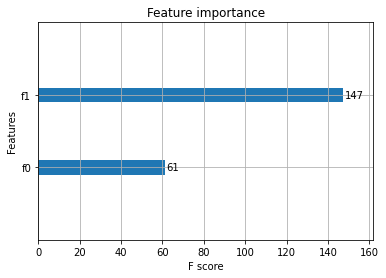

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
# prepare Train data
x_train = np.array(ratingsTrain)[:,:-1]
y_train = np.array(ratingsTrain)[:,-1]
y_train = y_train.astype(np.float)
for i in range(len(x_train)):
  x_train[i,0] = x_train[i,0][1:]
  x_train[i,1] = x_train[i,1][1:]
#   print(type(y_train[i]))
#   y_train[i] = float(y_train[i])
#   print(type(y_train[i]))
#   break
print(type(y_train[0]))
# return
# Prepare Test data
x_test = np.array(ratingsValid)[:,:-1]
y_test = np.array(ratingsValid)[:,-1]
y_test = y_test.astype(np.float)
for i in range(len(x_test)):
  x_test[i,0] = x_test[i,0][1:]
  x_test[i,1] = x_test[i,1][1:]
  # y_test[i] = int(y_test[i])




# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(silent=False, n_jobs=5, random_state=55, n_estimators=30)
train_results,test_results = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)
# train_results = run_xgboost_submit(first_xgb, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
# models_evaluation_train['first_algo'] = train_results
# models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

In [ ]:
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

In [ ]:
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

In [ ]:
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test

In [ ]:
# from surprise import KNNBaseline
# # we specify , how to compute similarities and what to consider with sim_options to our algorithm
# sim_options = {'user_based' : True,
#                'name': 'pearson_baseline',
#                'shrinkage': 100,
#                'min_support': 2
#               } 
# # we keep other parameters like regularization parameter and learning_rate as default values.
# bsl_options = {'method': 'sgd'} 

# knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
# knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# # Just store these error metrics in our models_evaluation datastructure
# models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
# models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


Training the model...


AttributeError: ignored

In [ ]:
from surprise import Reader, Dataset
from datetime import datetime
reader = Reader(rating_scale=(1,5))

import pandas as pd
# list_name = ['item_1', 'item_2', 'item_3',...]
dfTrain = pd.DataFrame (ratingsTrain, columns = ['user',"movie","rating"])
dfTest = pd.DataFrame (ratingsValid, columns = ['user',"movie","rating"])


# create the traindata from the dataframe...
train_data = Dataset.load_from_df(dfTrain[['user', 'movie', 'rating']], reader)
test_data = Dataset.load_from_df(dfTest[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 
testset = test_data.build_full_trainset() 


NameError: ignored

In [ ]:
from surprise import KNNBaseline
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 10,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 

knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
# models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
# models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...


### Assuming 50/50 test for READ PREDICTION

#### Rating model Alpha Beta
Test Acc: 0.6227

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
cnt0 = 0
cntPos = 0
cntNeg = 0
cnt01 = 0
cnt12 = 0
cnt23 = 0
cnt34 = 0
cnt3_35 = 0
cnt35_4 = 0
cnt45 = 0
for i in range(len(allRatings)):
  predRat = allRatings[i][2]
  if predRat == 0:
    cnt0+=1
  if predRat<=1 and predRat>0:
    cnt01+=1
  if predRat<=2 and predRat>1:
    cnt12+=1
  if predRat<=3 and predRat>2:
    cnt23+=1
  if predRat<=4 and predRat>3:
    cnt34+=1
    if predRat<=3.5:
      cnt3_35+=1
    else:
      cnt35_4+=1
  if predRat<=5 and predRat>4:
    cnt45+=1

print(cnt0,cnt01,cnt12,cnt23,cnt34,cnt45)
print(cnt3_35,cnt35_4)

10778 4396 12453 43432 66902 62039
0 66902


In [ ]:
# ratingsTrain = allRatings
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(((i[1],1)))
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add((i[0],1))

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
def modell(lamb):
  # lamb=1
  Bu = defaultdict(float)
  for user in itemsPerUser:
    # print("Ratings",len(ratingsPerUser[user]))
    # print(ratingsPerUser[user])
    ratiTmp = 0
    for i in ratingsPerUser[user]:
      ratiTmp+=i[1]
    Bu[user] = (ratiTmp/len(ratingsPerUser[user]))

  # print(Bu)


  # BI
  Bi = defaultdict(float)
  for item in usersPerItem:
    # print("Ratings",len(ratingsPerUser[user]))
    # print(ratingsPerUser[user])
    ratiTmp = 0
    # print(ratingsPerItem[item])
    # break
    for i in ratingsPerItem[item]:
      ratiTmp+=i[1]
    Bi[item] = (ratiTmp/len(ratingsPerItem[item]))

  # print(Bi)

  alpha = globalAvg
  # lamb = 1
  while True:
    # alpha
    palpha = alpha
    # print(Bu['u67805239'])
    numi = 0
    for i in ratingsTrain:
      user = i[0]
      item = i[1]
      rating = i[2]
      # print(rating,Bu[user],Bi[item])
      numi += rating-Bu[user]-Bi[item]
      # print(numi)
    # print("NUMI",numi)
    alpha = numi/len(ratingsTrain)
    # print("ALPHA",alpha)
    f=1
    # bu:
    
    for user in itemsPerUser: # gives me user names
      numi = 0
      for item in itemsPerUser[user]: # items of that uer
        item = item[0] # one item
        numi+=ratingDict[(user,item)]-alpha-Bi[item]
      deno = float(lamb)+len(itemsPerUser[user])
      # print(deno)
      Bu[user] = numi/deno
    
    # bi:
    
    for item in usersPerItem:
      numi = 0
      for user in usersPerItem[item]:
        user = user[0]
        numi+=ratingDict[(user,item)]-alpha-Bu[user]
      deno = float(lamb)+len(usersPerItem[item])
      Bi[item] = numi/deno
    # print(palpha,alpha)
    if round(palpha,2) == round(alpha,2):
      break
  # print("final",palpha,alpha)
  # accuracy = []
  return alpha,Bi,Bu
  # MSE
  # jay laud
  """
  sumi = 0
  for i in tqdm(ratingsValid):
    # print(i)
    # break
    user = i[0]
    bpred = i[1]
    rating = i[2]
    # print(user,bpred)
    # break
    # print(i)
    rating_pred = alpha+Bu[user]+Bi[bpred]

    sumi+=(rating_pred-rating)**2
    

  MSE = sumi/len(ratingsValid)
  print("MSE",MSE,float(lamb))
  return MSE
  # accuracy.append(acc)

  # print(acc)
  # print((accuracy.index(max(accuracy))+1),"%")
"""

In [ ]:
lambdaa = 4.46122830200134
alpha,Bi,Bu = modell(lambdaa)

In [ ]:
alpha

3.4848703670892864

In [ ]:
cntBooksPop = defaultdict(int)
for i in tqdm(itemsPerUser):
  # print(itemsPerUser[i])
  for j in itemsPerUser[i]:
    cntBooksPop[j[0]]+=1
  
cntBooksPop = dict(sorted(cntBooksPop.items(), key=lambda item: item[1],reverse=True))
print(cntBooksPop)

  0%|          | 0/27917 [00:00<?, ?it/s]

{'b93745301': 928, 'b06167371': 849, 'b70912031': 823, 'b79928088': 799, 'b29802159': 710, 'b19867465': 687, 'b08004121': 675, 'b82148195': 674, 'b78275112': 656, 'b09049778': 628, 'b74821603': 626, 'b26138336': 612, 'b52929604': 586, 'b23760358': 580, 'b66664015': 580, 'b79253970': 576, 'b05154189': 575, 'b08545824': 565, 'b18610759': 542, 'b26385014': 502, 'b86788370': 494, 'b93997659': 483, 'b07278059': 477, 'b08349503': 475, 'b88947899': 470, 'b58973293': 470, 'b60484296': 456, 'b29576446': 455, 'b05231805': 447, 'b21674268': 441, 'b98844131': 435, 'b52736396': 431, 'b61372131': 430, 'b40598851': 427, 'b29738200': 426, 'b63603925': 419, 'b31687952': 416, 'b07812624': 415, 'b66908318': 410, 'b31988440': 408, 'b78008834': 401, 'b56105038': 400, 'b03946791': 394, 'b29998162': 392, 'b31362596': 390, 'b50384790': 380, 'b52842739': 377, 'b19822827': 360, 'b21557753': 355, 'b67584295': 355, 'b35526856': 350, 'b12526023': 350, 'b12151882': 342, 'b76040943': 341, 'b69989437': 337, 'b8343968

In [ ]:
totalReadings = sum(cntBooksPop.values())
print(totalReadings)
print(len(cntBooksPop.values()))

190000
6684


In [ ]:
cnt = 0
top1Per = set()
for i in cntBooksPop:
  top1Per.add(i)
  cnt+=cntBooksPop[i]
  if cnt>totalReadings*0.74:
    break
len(top1Per)


1525

##### Processing testdata

In [ ]:
testItemPerUserRat = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = alpha+Bu[u]+Bi[b]
  testItemPerUserRat[u].append((b,predRat))

##### Creating Top 50 bottom 50 using rating

In [ ]:
for u in testItemPerUserRat:
  testItemPerUserRat[u] = sorted(testItemPerUserRat[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserRat[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserRat[u][b] = (testItemPerUserRat[u][b][0],1)
    else:
      testItemPerUserRat[u][b] = (testItemPerUserRat[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserRat[u][b][0]] = testItemPerUserRat[u][b][1]
  testItemPerUserRat[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserRat[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


#### Jaccard Rating
Test acc: 0.6693

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
# ratingsTrain = allRatings
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(i[1])
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add(i[0])

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
def Jaccard(s1, s2):
    try:
      return len(s1.intersection(s2))/len(s1.union(s2))
    except:
      return 0

In [ ]:
def avgItemReview(item):
  try:
    return sum(reviewsPerItem[item])/len(reviewsPerItem[item])
  except:
    return 0

In [ ]:
def ratingPred(user,item):
  if user not in itemsPerUser:
    # print("no user")
    return globalAvg
  if item not in usersPerItem:
    # print("no item")
    return globalAvg
  itemsInteracted = itemsPerUser[user]
  numi = 0
  deno = 0
  # print(len(reviewsPerUser[user]))
  # print(len(itemsPerUser[user]))
  for i in itemsInteracted:
    if i == item:
      continue
    else:
      numi += ((ratingDict[(user,i)]-avgItemReview(i))*Jaccard(set(usersPerItem[i]),set(usersPerItem[item])))
      deno += Jaccard(set(usersPerItem[i]),set(usersPerItem[item]))

  if numi == 0:
    # print("no user")
    return avgItemReview(item) + 0
  if deno == 0:
    return avgItemReview(item) + 0
  # print("1")
  return avgItemReview(item)+(numi/deno)

##### Processing testdata

In [ ]:
testItemPerUserJacRat = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = ratingPred(u,b)
  testItemPerUserJacRat[u].append((b,predRat))

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserJacRat:
  testItemPerUserJacRat[u] = sorted(testItemPerUserJacRat[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserJacRat[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserJacRat[u][b] = (testItemPerUserJacRat[u][b][0],1)
    else:
      testItemPerUserJacRat[u][b] = (testItemPerUserJacRat[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserJacRat[u][b][0]] = testItemPerUserJacRat[u][b][1]
  testItemPerUserJacRat[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserJacRat[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


#### Jaccard Similarity
Test acc: 0.7366

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
# ratingsTrain = allRatings
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(i[1])
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add(i[0])

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
cntBooksPop = defaultdict(int)
for i in tqdm(itemsPerUser):
  # print(itemsPerUser[i])
  for j in itemsPerUser[i]:
    cntBooksPop[j[0]]+=1
  
cntBooksPop = dict(sorted(cntBooksPop.items(), key=lambda item: item[1],reverse=True))
print(cntBooksPop)

  0%|          | 0/27917 [00:00<?, ?it/s]

{'b': 190000}


In [ ]:
totalReadings = sum(cntBooksPop.values())
print(totalReadings)
print(len(cntBooksPop.values()))

190000
1


In [ ]:
cnt = 0
top1Per = set()
for i in cntBooksPop:
  top1Per.add(i)
  cnt+=cntBooksPop[i]
  if cnt>totalReadings*0.74:
    break
len(top1Per)


1

In [ ]:
def Jaccard(s1, s2):
    try:
      return len(s1.intersection(s2))/len(s1.union(s2))
    except:
      return 0

In [ ]:
def avgItemReview(item):
  try:
    return sum(reviewsPerItem[item])/len(reviewsPerItem[item])
  except:
    return 0

In [ ]:
def simiPred(user,item):
  if user not in itemsPerUser:
    # print("no user")
    if item in top1Per:
      return float("inf")
    else:
      return float("-inf")
  if item not in usersPerItem:
    if item in top1Per:
      return float("inf")
    else:
      return float("-inf")
  itemsInteracted = itemsPerUser[user]
  numi = 0
  deno = 0
  # print(len(reviewsPerUser[user]))
  # print(len(itemsPerUser[user]))
  jaccardi = []
  for i in itemsInteracted:
    if i == item:
      continue
    else:
      jaccardi.append(Jaccard(set(usersPerItem[i]),set(usersPerItem[item])))
      
  return max(jaccardi)

##### Processing testdata

In [ ]:
testItemPerUserJacSim = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = simiPred(u,b)
  testItemPerUserJacSim[u].append((b,predRat))

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserJacSim:
  testItemPerUserJacSim[u] = sorted(testItemPerUserJacSim[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserJacSim[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserJacSim[u][b] = (testItemPerUserJacSim[u][b][0],1)
    else:
      testItemPerUserJacSim[u][b] = (testItemPerUserJacSim[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserJacSim[u][b][0]] = testItemPerUserJacSim[u][b][1]
  testItemPerUserJacSim[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserJacSim[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


#### Jaccard Inception Similarity
Test acc: 0.6693

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
# ratingsTrain = allRatings
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(i[1])
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add(i[0])

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
def Jaccard(s1, s2):
    try:
      return len(s1.intersection(s2))/len(s1.union(s2))
    except:
      return 0

In [ ]:
def avgItemReview(item):
  try:
    return sum(reviewsPerItem[item])/len(reviewsPerItem[item])
  except:
    return 0

In [ ]:
set({})

set()

In [ ]:
list(itemsPerUser.keys())[:5]

['u67805239', 'u54531895', 'u76549666', 'u03186275', 'u21322233']

In [ ]:
list(usersPerItem.keys())[:5]

['b61372131', 'b75189008', 'b75446982', 'b23482469', 'b09979253']

In [ ]:
tmp = set()
print(tmp)

set()


In [ ]:
def simiPred(user,item):
  itemsInteracted = itemsPerUser[user] 
  usersInteracted = usersPerItem[item]
  jaccardi = []
  bigItems = set()
  for u in usersInteracted:
    bigItems = bigItems | itemsPerUser[u]
  
  for i in itemsInteracted:
    if i==item:
      continue
    else:      
      subUsersInteracted = usersPerItem[i]
      smallItems = set()
      for u in subUsersInteracted:
        smallItems = smallItems|itemsPerUser[u]
      jacc = Jaccard(smallItems, bigItems)
      jaccardi.append(jacc)
  try:
    return max(jaccardi)
  except:
    return 0.3

##### Processing testdata

In [ ]:
testItemPerUserJacRat = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = simiPred(u,b)
  testItemPerUserJacRat[u].append((b,predRat))

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserJacRat:
  testItemPerUserJacRat[u] = sorted(testItemPerUserJacRat[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserJacRat[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserJacRat[u][b] = (testItemPerUserJacRat[u][b][0],1)
    else:
      testItemPerUserJacRat[u][b] = (testItemPerUserJacRat[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserJacRat[u][b][0]] = testItemPerUserJacRat[u][b][1]
  testItemPerUserJacRat[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserJacRat[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


#### Jaccard Similarity + Popular Books
Test acc: 0.7328

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
# ratingsTrain = allRatings
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(i[1])
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add(i[0])

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
cntBooksPop = defaultdict(int)
for i in tqdm(itemsPerUser):
  # print(itemsPerUser[i])
  for j in itemsPerUser[i]:
    cntBooksPop[j[0]]+=1
  
cntBooksPop = dict(sorted(cntBooksPop.items(), key=lambda item: item[1],reverse=True))
print(cntBooksPop)

  0%|          | 0/27917 [00:00<?, ?it/s]

{'b': 190000}


In [ ]:
totalReadings = sum(cntBooksPop.values())
print(totalReadings)
print(len(cntBooksPop.values()))

190000
1


In [ ]:
cnt = 0
top1Per = set()
for i in cntBooksPop:
  top1Per.add(i)
  cnt+=cntBooksPop[i]
  if cnt>totalReadings*0.74:
    break
len(top1Per)


1

In [ ]:
def Jaccard(s1, s2):
    try:
      return len(s1.intersection(s2))/len(s1.union(s2))
    except:
      return 0

In [ ]:
def avgItemReview(item):
  try:
    return sum(reviewsPerItem[item])/len(reviewsPerItem[item])
  except:
    return 0

In [ ]:
def simiPred(user,item):
  if item in top1Per:
    return float("inf")
  if user not in itemsPerUser:
    # print("no user")
    if item in top1Per:
      return float("inf")
    else:
      return 0.5
  if item not in usersPerItem:
    if item in top1Per:
      return float("inf")
    else:
      return 0.5
  itemsInteracted = itemsPerUser[user]
  numi = 0
  deno = 0
  # print(len(reviewsPerUser[user]))
  # print(len(itemsPerUser[user]))
  jaccardi = []
  for i in itemsInteracted:
    if i == item:
      continue
    else:
      jaccardi.append(Jaccard(set(usersPerItem[i]),set(usersPerItem[item])))
      
  return max(jaccardi)

##### Processing testdata

In [ ]:
testItemPerUserJacSimPop = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = simiPred(u,b)
  testItemPerUserJacSimPop[u].append((b,predRat))

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserJacSimPop:
  testItemPerUserJacSimPop[u] = sorted(testItemPerUserJacSimPop[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserJacSimPop[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserJacSimPop[u][b] = (testItemPerUserJacSimPop[u][b][0],1)
    else:
      testItemPerUserJacSimPop[u][b] = (testItemPerUserJacSimPop[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserJacSimPop[u][b][0]] = testItemPerUserJacSimPop[u][b][1]
  testItemPerUserJacSimPop[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserJacSimPop[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


#### Cosine Rating
Test acc: 0.6668

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
# ratingsTrain = allRatings
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(i[1])
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add(i[0])

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
def CosineSet(s1, s2):
  # Not a proper implementation, operates on sets so correct for interactions only
  numer = len(s1.intersection(s2))
  denom = math.sqrt(len(s1)) * math.sqrt(len(s2))
  if denom == 0:
      return 0
  return numer / denom

In [ ]:
def avgItemReview(item):
  try:
    return sum(reviewsPerItem[item])/len(reviewsPerItem[item])
  except:
    return 0

In [ ]:
def ratingPred(user,item):
  if user not in itemsPerUser:
    # print("no user")
    return globalAvg
  if item not in usersPerItem:
    # print("no item")
    return globalAvg
  itemsInteracted = itemsPerUser[user]
  numi = 0
  deno = 0
  # print(len(reviewsPerUser[user]))
  # print(len(itemsPerUser[user]))
  for i in itemsInteracted:
    if i == item:
      continue
    else:
      numi += ((ratingDict[(user,i)]-avgItemReview(i))*CosineSet(set(usersPerItem[i]),set(usersPerItem[item])))
      deno += CosineSet(set(usersPerItem[i]),set(usersPerItem[item]))

  if numi == 0:
    # print("no user")
    return avgItemReview(item) + 0
  if deno == 0:
    return avgItemReview(item) + 0
  # print("1")
  return avgItemReview(item)+(numi/deno)

##### Processing testdata

In [ ]:
testItemPerUserCosSimRat = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = ratingPred(u,b)
  testItemPerUserCosSimRat[u].append((b,predRat))

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserCosSimRat:
  testItemPerUserCosSimRat[u] = sorted(testItemPerUserCosSimRat[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserCosSimRat[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserCosSimRat[u][b] = (testItemPerUserCosSimRat[u][b][0],1)
    else:
      testItemPerUserCosSimRat[u][b] = (testItemPerUserCosSimRat[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserCosSimRat[u][b][0]] = testItemPerUserCosSimRat[u][b][1]
  testItemPerUserCosSimRat[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserCosSimRat[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


#### Cosine Similarity
Test acc: 0.6885

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
# ratingsTrain = allRatings
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(i[1])
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add(i[0])

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
cntBooksPop = defaultdict(int)
for i in tqdm(itemsPerUser):
  # print(itemsPerUser[i])
  for j in itemsPerUser[i]:
    cntBooksPop[j[0]]+=1
  
cntBooksPop = dict(sorted(cntBooksPop.items(), key=lambda item: item[1],reverse=True))
print(cntBooksPop)

  0%|          | 0/27917 [00:00<?, ?it/s]

{'b': 190000}


In [ ]:
totalReadings = sum(cntBooksPop.values())
print(totalReadings)
print(len(cntBooksPop.values()))

190000
1


In [ ]:
cnt = 0
top1Per = set()
for i in cntBooksPop:
  top1Per.add(i)
  cnt+=cntBooksPop[i]
  if cnt>totalReadings*0.74:
    break
len(top1Per)


1

In [ ]:
def CosineSet(s1, s2):
  # Not a proper implementation, operates on sets so correct for interactions only
  numer = len(s1.intersection(s2))
  denom = math.sqrt(len(s1)) * math.sqrt(len(s2))
  if denom == 0:
      return 0
  return numer / denom

In [ ]:
def avgItemReview(item):
  try:
    return sum(reviewsPerItem[item])/len(reviewsPerItem[item])
  except:
    return 0

In [ ]:
def simiPred(user,item):
  # print("bruh")
  if user not in itemsPerUser:
    # print("no user")
    if item in top1Per:
      return float("inf")
    else:
      return float("-inf")
  if item not in usersPerItem:
    # print("no item")
    if item in top1Per:
      return float("inf")
    else:
      return float("-inf")
  
  itemsInteracted = itemsPerUser[user]
  numi = 0
  deno = 0
  # print(len(reviewsPerUser[user]))
  # print(len(itemsPerUser[user]))
  cosii = []
  for i in itemsInteracted:
    if i == item:
      continue
    else:
      cosii.append(CosineSet(set(usersPerItem[i]),set(usersPerItem[item])))
      
  return max(cosii)

##### Processing testdata

In [ ]:
testItemPerUserCosSim = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = simiPred(u,b)
  testItemPerUserCosSim[u].append((b,predRat))

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserCosSim:
  testItemPerUserCosSim[u] = sorted(testItemPerUserCosSim[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserCosSim[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserCosSim[u][b] = (testItemPerUserCosSim[u][b][0],1)
    else:
      testItemPerUserCosSim[u][b] = (testItemPerUserCosSim[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserCosSim[u][b][0]] = testItemPerUserCosSim[u][b][1]
  testItemPerUserCosSim[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserCosSim[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


#### Pearson Similarity
Test acc: 0.6703

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
# ratingsTrain = allRatings
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(i[1])
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add(i[0])

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
cntBooksPop = defaultdict(int)
for i in tqdm(itemsPerUser):
  # print(itemsPerUser[i])
  for j in itemsPerUser[i]:
    cntBooksPop[j[0]]+=1
  
cntBooksPop = dict(sorted(cntBooksPop.items(), key=lambda item: item[1],reverse=True))
print(cntBooksPop)

  0%|          | 0/27917 [00:00<?, ?it/s]

{'b': 190000}


In [ ]:
totalReadings = sum(cntBooksPop.values())
print(totalReadings)
print(len(cntBooksPop.values()))

190000
1


In [ ]:
cnt = 0
top1Per = set()
for i in cntBooksPop:
  top1Per.add(i)
  cnt+=cntBooksPop[i]
  if cnt>totalReadings*0.74:
    break
len(top1Per)


1

In [ ]:
def avgItemReview(item):
  try:
    return sum(reviewsPerItem[item])/len(reviewsPerItem[item])
  except:
    return 0

In [ ]:
def Pearson(i1, i2):
    # Between two items
    iBar1 = avgItemReview(i1)
    iBar2 = avgItemReview(i2)
    inter = usersPerItem[i1].intersection(usersPerItem[i2])
    numer = 0
    denom1 = 0
    denom2 = 0
    for u in inter:
        numer += (ratingDict[(u,i1)] - iBar1)*(ratingDict[(u,i2)] - iBar2)
    for u in inter: #usersPerItem[i1]:
        denom1 += (ratingDict[(u,i1)] - iBar1)**2
    #for u in usersPerItem[i2]:
        denom2 += (ratingDict[(u,i2)] - iBar2)**2
    denom = math.sqrt(denom1) * math.sqrt(denom2)
    if denom == 0: return 0
    return numer / denom

In [ ]:
def simiPred(user,item):
  # print("bruh")
  if user not in itemsPerUser:
    # print("no user")
    if item in top1Per:
      return float("inf")
    else:
      return float("-inf")
  if item not in usersPerItem:
    # print("no item")
    if item in top1Per:
      return float("inf")
    else:
      return float("-inf")
  # print("bruh")
  itemsInteracted = itemsPerUser[user]
  numi = 0
  deno = 0
  # print(len(reviewsPerUser[user]))
  # print(len(itemsPerUser[user]))
  pearsi = []
  for i in itemsInteracted:
    if i == item:
      continue
    else:
      pearsi.append(Pearson(i,item))
      
  return max(pearsi)

##### Processing testdata

In [ ]:
testItemPerUserPearSim = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = simiPred(u,b)
  testItemPerUserPearSim[u].append((b,predRat))

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserPearSim:
  testItemPerUserPearSim[u] = sorted(testItemPerUserPearSim[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserPearSim[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserPearSim[u][b] = (testItemPerUserPearSim[u][b][0],1)
    else:
      testItemPerUserPearSim[u][b] = (testItemPerUserPearSim[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserPearSim[u][b][0]] = testItemPerUserPearSim[u][b][1]
  testItemPerUserPearSim[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserPearSim[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


#### Rating Pred using LibRecommender
something is wrong 4.999

In [ ]:
!pip install LibRecommender

  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
dataset = []
for l in readCSV("train_Interactions.csv.gz"):
    dataset.append(l)


In [ ]:
for i in range(len(dataset)):
  dataset[i][0] = int(dataset[i][0][1:])
  dataset[i][1] = int(dataset[i][1][1:])
  dataset[i][2] = int(dataset[i][2])

In [ ]:
import numpy as np
import pandas as pd
from libreco.data import random_split, DatasetPure
from libreco.algorithms import SVDpp  # pure data, algorithm SVD++
from libreco.evaluation import evaluate

import pandas as pd
# list_name = ['item_1', 'item_2', 'item_3',...]
data = pd.DataFrame (dataset, columns = ['user',"item","label"])


# print(data.head)
# split whole data into three folds for training, evaluating and testing
train_data, eval_data, test_data = random_split(data, multi_ratios=[0.8, 0.1, 0.1])

train_data, data_info = DatasetPure.build_trainset(train_data)

eval_data = DatasetPure.build_evalset(eval_data)
test_data = DatasetPure.build_testset(test_data)
print(data_info)   # n_users: 5894, n_items: 3253, data sparsity: 0.4172 %
import tensorflow as tf
tf.compat.v1.reset_default_graph()
svdpp = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=11, lr=0.001,
              reg=None, batch_size=256)
# monitor metrics on eval_data during training
svdpp.fit(train_data, verbose=2, eval_data=eval_data, metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
print("evaluate_result: ", evaluate(model=svdpp, data=test_data,
                                    metrics=["rmse", "mae"]))
# predict preference of user 2211 to item 110
print("prediction: ", svdpp.predict(user=2211, item=110))
# recommend 7 items for user 2211
print("recommendation: ", svdpp.recommend_user(user=2211, n_rec=7))

# cold-start prediction
print("cold prediction: ", svdpp.predict(user="ccc", item="not item",
                                         cold_start="average"))
# cold-start recommendation
print("cold recommendation: ", svdpp.recommend_user(user="are we good?",
                                                    n_rec=7,
                                                    cold_start="popular"))

n_users: 27706, n_items: 6667, data sparsity: 0.0866 %
Training start time: 2022-11-13 00:07:17


train: 100%|██████████| 625/625 [00:17<00:00, 35.92it/s]


Epoch 1 elapsed: 17.478s
	 train_loss: 10.8458


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 412.97it/s]


	 eval rmse: 2.2334
	 eval mae: 1.8952
	 eval r2: -1.8809


train: 100%|██████████| 625/625 [00:14<00:00, 44.12it/s]


Epoch 2 elapsed: 14.213s
	 train_loss: 3.2712


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 309.08it/s]


	 eval rmse: 1.7224
	 eval mae: 1.3991
	 eval r2: -0.7134


train: 100%|██████████| 625/625 [00:13<00:00, 46.22it/s]


Epoch 3 elapsed: 13.571s
	 train_loss: 2.205


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 284.06it/s]


	 eval rmse: 1.5648
	 eval mae: 1.2535
	 eval r2: -0.4142


train: 100%|██████████| 625/625 [00:13<00:00, 45.45it/s]


Epoch 4 elapsed: 13.808s
	 train_loss: 1.7896


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 347.55it/s]


	 eval rmse: 1.4756
	 eval mae: 1.1694
	 eval r2: -0.2576


train: 100%|██████████| 625/625 [00:14<00:00, 43.13it/s]


Epoch 5 elapsed: 14.533s
	 train_loss: 1.5485


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 309.89it/s]


	 eval rmse: 1.4206
	 eval mae: 1.1149
	 eval r2: -0.1656


train: 100%|██████████| 625/625 [00:13<00:00, 45.65it/s]


Epoch 6 elapsed: 13.739s
	 train_loss: 1.3861


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 453.10it/s]


	 eval rmse: 1.3827
	 eval mae: 1.0770
	 eval r2: -0.1042


train: 100%|██████████| 625/625 [00:13<00:00, 45.40it/s]


Epoch 7 elapsed: 13.818s
	 train_loss: 1.268


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 435.95it/s]


	 eval rmse: 1.3572
	 eval mae: 1.0508
	 eval r2: -0.0638


train: 100%|██████████| 625/625 [00:12<00:00, 48.26it/s]


Epoch 8 elapsed: 13.000s
	 train_loss: 1.179


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 292.39it/s]


	 eval rmse: 1.3417
	 eval mae: 1.0337
	 eval r2: -0.0397


train: 100%|██████████| 625/625 [00:12<00:00, 48.82it/s]


Epoch 9 elapsed: 12.849s
	 train_loss: 1.1077


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 314.78it/s]


	 eval rmse: 1.3341
	 eval mae: 1.0247
	 eval r2: -0.0280


train: 100%|██████████| 625/625 [00:13<00:00, 45.84it/s]


Epoch 10 elapsed: 13.679s
	 train_loss: 1.0483


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 573.57it/s]


	 eval rmse: 1.3299
	 eval mae: 1.0176
	 eval r2: -0.0214


train: 100%|██████████| 625/625 [00:12<00:00, 48.20it/s]


Epoch 11 elapsed: 13.015s
	 train_loss: 0.996


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 364.09it/s]


	 eval rmse: 1.3276
	 eval mae: 1.0129
	 eval r2: -0.0179


eval_pred: 100%|██████████| 3/3 [00:00<00:00, 362.13it/s]

evaluate_result:  {'rmse': 1.3295184629158248, 'mae': 1.008127332601833}
Detect 1 unknown interaction(s), position: [0]
prediction:  [3.2606466]
detect unknown user: 2211
recommendation:  [(57808985, 5.110208), (85459545, 5.1089253), (17585039, 4.874159), (30153754, 4.812711), (34849626, 4.8028855), (71263254, 4.7972336), (29946706, 4.787979)]
Detect 1 unknown interaction(s), position: [0]
cold prediction:  [3.2606466]
detect unknown user: are we good?
cold recommendation:  [93745301, 6167371, 70912031, 79928088, 29802159, 19867465, 8004121]


In [ ]:
print("prediction: ", svdpp.predict(user=2211, item=110)[0])

Detect 1 unknown interaction(s), position: [0]
prediction:  3.2606466


##### Processing testdata

In [ ]:
testItemPerUserLibRat = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = svdpp.predict(user=u[1:], item=b[1:])
  testItemPerUserLibRat[u].append((b,predRat))

##### Creating Top 50 bottom 50 using rating

In [ ]:
for u in testItemPerUserLibRat:
  testItemPerUserLibRat[u] = sorted(testItemPerUserLibRat[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserLibRat[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserLibRat[u][b] = (testItemPerUserLibRat[u][b][0],1)
    else:
      testItemPerUserLibRat[u][b] = (testItemPerUserLibRat[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserLibRat[u][b][0]] = testItemPerUserLibRat[u][b][1]
  testItemPerUserLibRat[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserLibRat[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


#### XG boost

In [ ]:
dataset = []
for l in readCSV("train_Interactions.csv.gz"):
    dataset.append(l)

for i in range(len(dataset)):
  dataset[i][0] = int(dataset[i][0][1:])
  dataset[i][1] = int(dataset[i][1][1:])
  dataset[i][2] = int(dataset[i][2])


In [ ]:
# ratingsTrain = allRatings
ratingsTrain = dataset
# ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[['u67805239', 'b61372131', 4],
 ['u54531895', 'b75189008', 4],
 ['u76549666', 'b75446982', 4],
 ['u03186275', 'b23482469', 2],
 ['u21322233', 'b09979253', 3],
 ['u00402241', 'b68456479', 1],
 ['u88999268', 'b49553867', 0],
 ['u39455611', 'b40151793', 5],
 ['u90502882', 'b01672704', 4],
 ['u92679832', 'b26246971', 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(i[1])
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add(i[0])

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
cntBooksPop = defaultdict(int)
for i in tqdm(itemsPerUser):
  # print(itemsPerUser[i])
  for j in itemsPerUser[i]:
    cntBooksPop[j]+=1
  
cntBooksPop = dict(sorted(cntBooksPop.items(), key=lambda item: item[1],reverse=True))
print(cntBooksPop)

  0%|          | 0/27945 [00:00<?, ?it/s]

{93745301: 974, 6167371: 889, 70912031: 864, 79928088: 838, 29802159: 750, 19867465: 716, 8004121: 704, 78275112: 702, 82148195: 696, 74821603: 666, 9049778: 664, 26138336: 645, 52929604: 620, 66664015: 617, 23760358: 607, 79253970: 602, 8545824: 596, 5154189: 589, 18610759: 569, 26385014: 519, 86788370: 517, 93997659: 507, 8349503: 502, 7278059: 499, 88947899: 491, 58973293: 487, 29576446: 483, 60484296: 479, 61372131: 463, 21674268: 461, 5231805: 458, 98844131: 455, 40598851: 454, 63603925: 446, 29738200: 446, 52736396: 443, 31687952: 439, 7812624: 437, 66908318: 432, 31988440: 430, 56105038: 421, 78008834: 418, 3946791: 415, 31362596: 410, 29998162: 410, 52842739: 395, 50384790: 395, 19822827: 386, 21557753: 378, 67584295: 373, 35526856: 372, 12526023: 367, 17187529: 358, 83439687: 357, 76040943: 356, 69989437: 356, 12151882: 355, 10567312: 347, 86376623: 337, 43914262: 332, 37657413: 330, 64898087: 327, 37068431: 327, 57528832: 326, 88487078: 312, 49553867: 311, 278122: 310, 737886

In [ ]:
totalReadings = sum(cntBooksPop.values())
print(totalReadings)
print(len(cntBooksPop.values()))

200000
6688


In [ ]:
cnt = 0
top1Per = set()
for i in cntBooksPop:
  top1Per.add(i)
  cnt+=cntBooksPop[i]
  if cnt>totalReadings*0.74:
    break
len(top1Per)


1528

In [ ]:
userToNumber = {}
cnt = 0
for u in itemsPerUser:
  userToNumber[u] = cnt
  cnt+=1
len(userToNumber.keys())

27945

In [ ]:
itemToNumber = {}
cnt = 0
for i in usersPerItem:
  itemToNumber[i] = cnt
  cnt+=1
len(itemToNumber.keys())

6688

In [ ]:
for i in range(len(ratingsTrain)):
  ratingsTrain[i][0] = userToNumber[ratingsTrain[i][0]]
  ratingsTrain[i][1] = itemToNumber[ratingsTrain[i][1]]


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 22 22:03:59 2017

@author: heman
"""

import numpy as np
import pandas as pd



df = pd.DataFrame (ratingsTrain, columns = ['user_id',"item_id","rating"])

# header = ['user_id', 'item_id', 'rating', 'timestamp']
# df = pd.read_csv('ml-100k/u.data', sep='\t', names=header)

n_users = df.user_id.unique().shape[0]
# print(n_users)
n_items = df.item_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

print ('User-based MemoryCF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print ('Item-based MemoryCF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

sparsity=round(1.0-len(df)/float(n_users*n_items),3)
print ('The sparsity level of MovieLens100K is ' +  str(sparsity*100) + '%')

#update: Using package for SVD
from scipy.sparse.linalg import svds
#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)

X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print ('User-based ModelCF MSE: ' + str(rmse(X_pred, test_data_matrix)))

Number of users = 27945 | Number of movies = 6688


#### SVD latent factor rating
1.5324782962029768	
0.5813

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][0] = int(allRatings[i][0][1:])
  allRatings[i][1] = int(allRatings[i][1][1:])
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
import pandas as pd
df = pd.DataFrame (allRatings, columns = ['user',"item","rating"])

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 22.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633983 sha256=0c4409c0bd3faca17f46333e26fabbee2fbc08832a1071cd2edd715642e37d25
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import SVD , Reader , Dataset
from surprise. model_selection import train_test_split

In [ ]:
# reader = Reader( line_format ='user item rating', sep=',')
reader = Reader(rating_scale=(0, 5))
data = Dataset. load_from_df(df, reader= reader)
dataTrain , dataTest = train_test_split (data , test_size =.25)

In [ ]:
model = SVD ()
model.fit( dataTrain )
predictions = model.test(dataTest)

In [ ]:
sse = 0
for p in predictions :
  sse += (p.r_ui - p.est)**2
MSE = sse / len( predictions )

In [ ]:
MSE

1.5202526087929678

In [ ]:
df[:4]

,user,item,rating
0,67805239,61372131,4
1,54531895,75189008,4
2,76549666,75446982,4
3,3186275,23482469,2


In [ ]:
print(model.predict(76549666,75446982)[3])

3.7876334023631593


##### Processing testdata

In [ ]:

testItemPerUserSVD = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = model.predict(int(u[1:]),int(b[1:]))[3]
  testItemPerUserSVD[u].append((b,predRat))

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserSVD:
  testItemPerUserSVD[u] = sorted(testItemPerUserSVD[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserSVD[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserSVD[u][b] = (testItemPerUserSVD[u][b][0],1)
    else:
      testItemPerUserSVD[u][b] = (testItemPerUserSVD[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserSVD[u][b][0]] = testItemPerUserSVD[u][b][1]
  testItemPerUserSVD[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserSVD[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


In [ ]:
cntPos = 0
cntNeg = 0
cnt01 = 0 
cnt12 = 0 
cnt23 = 0 
cnt34 = 0
cnt3_35 = 0
cnt35_4 = 0
cnt45 = 0 
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = model.predict(int(u[1:]),int(b[1:]))[3]
  # 0   1      2     3       4     5
# 10778 4396 12453 43432 66902 62039
  if predRat<0:
    predRat = 0
    cntNeg+=1
  if predRat>5:
    predRat = 5
    cntPos+=1


  if predRat<=1 and predRat>0:
    cnt01+=1
  if predRat<=2 and predRat>1:
    cnt12+=1
  if predRat<=3 and predRat>2:
    cnt23+=1
  if predRat<=4 and predRat>3:
    cnt34+=1
    if predRat<=3.5:
      cnt3_35+=1
    else:
      cnt35_4+=1
  if predRat<=5 and predRat>4:
    cnt45+=1

  if predRat < 0.5:
    predRat = 0
  # if predRat > 0.8 and predRat < 1 : 
  #   predRat = 1
  if (abs(predRat - round(predRat))<0.1):
    predRat = round(predRat)

  if predRat>=2.7 and predRat<=3:
    predRat = 3




  predictions.write(u + ',' + b + ',' + str(predRat) + '\n')

predictions.close()
print("neg",cntNeg)
print("pos",cntPos)
print(cnt01,cnt12,cnt23,cnt34,cnt45)
print(cnt3_35,cnt35_4)

neg 0
pos 0
4 32 605 6582 2777
2293 4289


#### implicit bpr rating
1.5324782962029768	
0.5813

In [ ]:
dataset = []
for l in readCSV("train_Interactions.csv.gz"):
    dataset.append(l)

for i in range(len(dataset)):
  dataset[i][0] = int(dataset[i][0][1:])
  dataset[i][1] = int(dataset[i][1][1:])
  dataset[i][2] = int(dataset[i][2])


In [ ]:
# ratingsTrain = allRatings
ratingsTrain = dataset
# ratingsValid = allRatings[190000:]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
(allRatings[:10])

[[67805239, 61372131, 4],
 [54531895, 75189008, 4],
 [76549666, 75446982, 4],
 [3186275, 23482469, 2],
 [21322233, 9979253, 3],
 [402241, 68456479, 1],
 [88999268, 49553867, 0],
 [39455611, 40151793, 5],
 [90502882, 1672704, 4],
 [92679832, 26246971, 4]]

In [ ]:
type(ratingsValid[:10])

list

In [ ]:
from tqdm.notebook import tqdm
import time

In [ ]:
# for i in tqdm(ratingsValid):
#   time.sleep(.001)
#   pass

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(i[1])
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add(i[0])

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
globalAvg = sum(ratingDict.values())/len(ratingDict)

In [ ]:
userToNumber = {}
cnt = 0
for u in itemsPerUser:
  userToNumber[u] = cnt
  cnt+=1
len(userToNumber.keys())

27945

In [ ]:
itemToNumber = {}
cnt = 0
for i in usersPerItem:
  itemToNumber[i] = cnt
  cnt+=1
len(itemToNumber.keys())

6688

In [ ]:
for i in range(len(ratingsTrain)):
  ratingsTrain[i][0] = userToNumber[ratingsTrain[i][0]]
  ratingsTrain[i][1] = itemToNumber[ratingsTrain[i][1]]


In [ ]:
!pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from implicit import bpr

In [ ]:
nUsers = len(userToNumber.keys())
nItems = len(itemToNumber.keys())
import pandas as pd
# df = pd.DataFrame (ratingsTrain, columns = ['user',"item","rating"])
Xiu = scipy.sparse.lil_matrix((nItems,nUsers)) #
# Initialized after extracting the number of users and
# items
for d in ratingsTrain:
  Xiu[d[1], d[0]] = 1 #
# Only storing positive feedback instances
Xui = scipy.sparse. csr_matrix (Xiu.T)

In [ ]:
model = bpr.BayesianPersonalizedRanking (factors = 5)
model.fit(Xiu)

/usr/local/lib/python3.7/dist-packages/implicit/utils.py:141: ParameterWarning: Method expects CSR input, and was passed lil_matrix instead. Converting to CSR took 0.008584976196289062 seconds
  ParameterWarning,


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
itemFactors = model.item_factors
userFactors = model.user_factors
print(len(itemFactors))
print(len(userFactors))
# print(Xui[0][:5])
# model.predict(0,1)
userr = 0
recommended = model.recommend(userr, Xui[userr],10,) # Recommendations for
# related = model.similar_items(userr)
# model.

print(recommended)
# print(related)


27945
6688
(array([12170, 24572,  4796,  1255, 19537, 11631, 15565, 17995, 25334,
       15366], dtype=int32), array([3.652492 , 3.543055 , 3.482887 , 3.436944 , 3.3689404, 3.3590553,
       3.3589253, 3.3188384, 3.2770512, 3.2727175], dtype=float32))


In [ ]:
12170 in model.recommend(userr, Xui[userr],10,)[0]

True

In [ ]:
def predd(u,b):
  u = userToNumber[int(u[1:])]
  b = itemToNumber[int(u[1:])]
  if b in model.recommend(u, Xui[u],10,)[0]:
    return float("inf")
  else:
    return float("-inf")

##### Processing testdata

In [ ]:
testItemPerUserBPR = defaultdict(list)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    # predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = predd(u,b)
  testItemPerUserBPR[u].append((b,predRat))

TypeError: ignored

##### Creating Top 50 bottom 50 using Jaccard

In [ ]:
for u in testItemPerUserBPR:
  testItemPerUserBPR[u] = sorted(testItemPerUserBPR[u],key=lambda x:x[1],reverse=True)
  n = len(testItemPerUserBPR[u])
  for b in range(n):
    if b < n//2:
      testItemPerUserBPR[u][b] = (testItemPerUserBPR[u][b][0],1)
    else:
      testItemPerUserBPR[u][b] = (testItemPerUserBPR[u][b][0],0)
  tmp = {}
  for b in range(n):
    tmp[testItemPerUserBPR[u][b][0]] = testItemPerUserBPR[u][b][1]
  testItemPerUserBPR[u] = tmp

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  read = testItemPerUserBPR[u][b]
  predictions.write(u + ',' + b + ',' + str(read) + '\n')

predictions.close()


In [ ]:
cntPos = 0
cntNeg = 0
cnt01 = 0 
cnt12 = 0 
cnt23 = 0 
cnt34 = 0
cnt3_35 = 0
cnt35_4 = 0
cnt45 = 0 
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  predRat = model.predict(int(u[1:]),int(b[1:]))[3]
  # 0   1      2     3       4     5
# 10778 4396 12453 43432 66902 62039
  if predRat<0:
    predRat = 0
    cntNeg+=1
  if predRat>5:
    predRat = 5
    cntPos+=1


  if predRat<=1 and predRat>0:
    cnt01+=1
  if predRat<=2 and predRat>1:
    cnt12+=1
  if predRat<=3 and predRat>2:
    cnt23+=1
  if predRat<=4 and predRat>3:
    cnt34+=1
    if predRat<=3.5:
      cnt3_35+=1
    else:
      cnt35_4+=1
  if predRat<=5 and predRat>4:
    cnt45+=1

  if predRat < 0.5:
    predRat = 0
  # if predRat > 0.8 and predRat < 1 : 
  #   predRat = 1
  if (abs(predRat - round(predRat))<0.1):
    predRat = round(predRat)

  if predRat>=2.7 and predRat<=3:
    predRat = 3




  predictions.write(u + ',' + b + ',' + str(predRat) + '\n')

predictions.close()
print("neg",cntNeg)
print("pos",cntPos)
print(cnt01,cnt12,cnt23,cnt34,cnt45)
print(cnt3_35,cnt35_4)

neg 0
pos 0
4 32 605 6582 2777
2293 4289


### Voting

#### Top1TierDict

In [ ]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [ ]:
for i in range(len(allRatings)):
  allRatings[i][2] = int(allRatings[i][2])

In [ ]:
# ratingsTrain = allRatings[:190000]
# ratingsValid = allRatings[190000:]
ratingsTrain = allRatings
ratingsValid = allRatings
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated

In [ ]:
ratingDict = {} # To retrieve a rating for a specific user/item pair

In [ ]:
for i in ratingsTrain:
  # if i[0] not in itemsPerUser:
  #   itemsPerUser[i[0]] = [i[1]]
  # else:
  itemsPerUser[i[0]].add(((i[1],1)))
  
  # if i[1] not in usersPerItem:
  #   usersPerItem[i[1]] = [i[0]]
  # else:
  usersPerItem[i[1]].add((i[0],1))

  ratingDict[(i[0],i[1])] = i[2]

  # print(itemsPerUser)
  

In [ ]:
cntBooksPop = defaultdict(int)
for i in tqdm(itemsPerUser):
  # print(itemsPerUser[i])
  for j in itemsPerUser[i]:
    cntBooksPop[j[0]]+=1
  
cntBooksPop = dict(sorted(cntBooksPop.items(), key=lambda item: item[1],reverse=True))
print(cntBooksPop)

  0%|          | 0/27945 [00:00<?, ?it/s]

{'b93745301': 974, 'b06167371': 889, 'b70912031': 864, 'b79928088': 838, 'b29802159': 750, 'b19867465': 716, 'b08004121': 704, 'b78275112': 702, 'b82148195': 696, 'b74821603': 666, 'b09049778': 664, 'b26138336': 645, 'b52929604': 620, 'b66664015': 617, 'b23760358': 607, 'b79253970': 602, 'b08545824': 596, 'b05154189': 589, 'b18610759': 569, 'b26385014': 519, 'b86788370': 517, 'b93997659': 507, 'b08349503': 502, 'b07278059': 499, 'b88947899': 491, 'b58973293': 487, 'b29576446': 483, 'b60484296': 479, 'b61372131': 463, 'b21674268': 461, 'b05231805': 458, 'b98844131': 455, 'b40598851': 454, 'b63603925': 446, 'b29738200': 446, 'b52736396': 443, 'b31687952': 439, 'b07812624': 437, 'b66908318': 432, 'b31988440': 430, 'b56105038': 421, 'b78008834': 418, 'b03946791': 415, 'b31362596': 410, 'b29998162': 410, 'b52842739': 395, 'b50384790': 395, 'b19822827': 386, 'b21557753': 378, 'b67584295': 373, 'b35526856': 372, 'b12526023': 367, 'b17187529': 358, 'b83439687': 357, 'b76040943': 356, 'b6998943

In [ ]:
totalReadings = sum(cntBooksPop.values())
print(totalReadings)
print(len(cntBooksPop.values()))

200000
6688


In [ ]:
cnt = 0
top1Per = set()
for i in cntBooksPop:
  top1Per.add(i)
  cnt+=cntBooksPop[i]
  if cnt>totalReadings*0.738:
    break
len(top1Per)


1514

In [ ]:
testItemPerUsert1t = defaultdict(dict)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    continue
  u,b = l.strip().split(',')
  if b in top1Per:
    testItemPerUsert1t[u][b] = 1
  else:
    testItemPerUsert1t[u][b] = 0

#### All train
0.7672

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  tmp = testItemPerUsert1t[u][b]
  if tmp == 1:
    predictions.write(u + ',' + b + ',' + "1" + '\n')
  else:
    predictions.write(u + ',' + b + ',' + "0" + '\n')


predictions.close()


#### Actual Voting N,J

In [ ]:
finalDict = defaultdict(dict)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    continue
  u,b = l.strip().split(',')
  vote = testItemPerUsert1t[u][b] + testItemPerUserJacSim[u][b]
  finalDict[u][b] = vote

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  tmp = finalDict[u][b]
  if tmp >= 1:
    predictions.write(u + ',' + b + ',' + "1" + '\n')
  else:
    predictions.write(u + ',' + b + ',' + "0" + '\n')


predictions.close()


#### Actual Voting of N,J,C

In [ ]:
finalDict = defaultdict(dict)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    continue
  u,b = l.strip().split(',')
  vote = testItemPerUsert1t[u][b] + testItemPerUserJacSim[u][b] + testItemPerUserCosSim[u][b]
  finalDict[u][b] = vote

##### Read if 3
test acc = 0.732

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  tmp = finalDict[u][b]
  if tmp == 3:
    predictions.write(u + ',' + b + ',' + "1" + '\n')
  else:
    predictions.write(u + ',' + b + ',' + "0" + '\n')


predictions.close()


##### Read if >=2
test acc = 0.732

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  tmp = finalDict[u][b]
  if tmp >= 2:
    predictions.write(u + ',' + b + ',' + "1" + '\n')
  else:
    predictions.write(u + ',' + b + ',' + "0" + '\n')


predictions.close()


#### Actual Voting of N,J,C,P

In [ ]:
finalDict = defaultdict(dict)
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    continue
  u,b = l.strip().split(',')
  vote = testItemPerUsert1t[u][b] + testItemPerUserJacSim[u][b] + testItemPerUserCosSim[u][b] + testItemPerUserPearSim[u][b]
  finalDict[u][b] = vote

##### Read if >=3
test acc = 0.7309

In [ ]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,b = l.strip().split(',')
  tmp = finalDict[u][b]
  if tmp >= 3:
    predictions.write(u + ',' + b + ',' + "1" + '\n')
  else:
    predictions.write(u + ',' + b + ',' + "0" + '\n')


predictions.close()
